In [2]:
import numpy as np
data=[[0,1],[1,1],[1,0]]
u,sigma,vt=np.linalg.svd(data)

In [5]:
u

array([[-4.08248290e-01,  7.07106781e-01,  5.77350269e-01],
       [-8.16496581e-01,  7.45552182e-17, -5.77350269e-01],
       [-4.08248290e-01, -7.07106781e-01,  5.77350269e-01]])

In [6]:
sigma

array([1.73205081, 1.        ])

In [7]:
vt

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [20]:
x=u.shape[0]
y=vt.shape[1]
sigma_matrix=np.zeros((x,y))
sigma_matrix[:sigma.shape[0],:sigma.shape[0]]=np.diag(sigma)

In [21]:
sigma_matrix

array([[1.73205081, 0.        ],
       [0.        , 1.        ],
       [0.        , 0.        ]])

In [41]:
np.matmul(np.matmul(u,sigma_matrix),vt)

array([[ 1.02120423e-16,  1.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00, -2.11898069e-16]])

In [26]:
np.array(data)

array([[0, 1],
       [1, 1],
       [1, 0]])

In [27]:
data1=[[1,1,1,0,0],[2,2,2,0,0],[1,1,1,0,0],[5,5,5,0,0],[1,1,0,2,2],[0,0,0,3,3],[0,0,0,1,1]]

In [30]:
u_,sigma_,vt_=np.linalg.svd(data1)

In [31]:
sigma_

array([9.72140007e+00, 5.29397912e+00, 6.84226362e-01, 1.89194737e-15,
       1.35001244e-31])

In [33]:
sigma_matrix_=np.diag(sigma_[:3])
sigma_matrix_

array([[9.72140007, 0.        , 0.        ],
       [0.        , 5.29397912, 0.        ],
       [0.        , 0.        , 0.68422636]])

In [42]:
np.matmul(np.matmul(u_[:,:3],sigma_matrix_),vt_[:3,:])

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        -2.21000879e-16, -2.21000879e-16],
       [ 2.00000000e+00,  2.00000000e+00,  2.00000000e+00,
         1.36252394e-16,  1.36252394e-16],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.59868907e-15,  1.59868907e-15],
       [ 5.00000000e+00,  5.00000000e+00,  5.00000000e+00,
        -1.64544310e-17, -1.64544310e-17],
       [ 1.00000000e+00,  1.00000000e+00, -3.31528937e-16,
         2.00000000e+00,  2.00000000e+00],
       [ 8.26554259e-17,  1.01276122e-15, -8.38453004e-16,
         3.00000000e+00,  3.00000000e+00],
       [ 5.64591452e-17,  3.66494409e-16, -3.70708890e-16,
         1.00000000e+00,  1.00000000e+00]])

In [45]:
np.round(np.matmul(np.matmul(u_[:,:3],sigma_matrix_),vt_[:3,:]))

array([[ 1.,  1.,  1., -0., -0.],
       [ 2.,  2.,  2.,  0.,  0.],
       [ 1.,  1.,  1.,  0.,  0.],
       [ 5.,  5.,  5., -0., -0.],
       [ 1.,  1., -0.,  2.,  2.],
       [ 0.,  0., -0.,  3.,  3.],
       [ 0.,  0., -0.,  1.,  1.]])

In [40]:
np.array(data1)

array([[1, 1, 1, 0, 0],
       [2, 2, 2, 0, 0],
       [1, 1, 1, 0, 0],
       [5, 5, 5, 0, 0],
       [1, 1, 0, 2, 2],
       [0, 0, 0, 3, 3],
       [0, 0, 0, 1, 1]])

In [49]:
import numpy as np
import cv2
 
img = cv2.imread('curry-durant.jpeg')
print('origin image shape is ', img.shape)
# 表示 RGB 中各有一个矩阵，都为300*532
#  origin image shape is  (300, 532, 3)


def svd_compression(img, k):
    res_image = np.zeros_like(img)
    for i in range(img.shape[2]):
        # 进行奇异值分解, 从svd函数中得到的奇异值sigma 是从大到小排列的
        U, Sigma, VT = np.linalg.svd(img[:,:,i])
        res_image[:, :, i] = U[:,:k].dot(np.diag(Sigma[:k])).dot(VT[:k,:])
 
    return res_image

# 保留前 k 个奇异值
res1 = svd_compression(img, k=300)
res2 = svd_compression(img, k=200)
res3 = svd_compression(img, k=100)
res4 = svd_compression(img, k=50)
 
row11 = np.hstack((res1, res2))
row22 = np.hstack((res3, res4))
res = np.vstack((row11, row22))
 
cv2.imshow('img', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

origin image shape is  (675, 1200, 3)


In [48]:
img = cv2.imread('icon.png')
print('origin image shape is ', img.shape)
# 表示 RGB 中各有一个矩阵，都为300*532
#  origin image shape is  (300, 532, 3)
res1 = svd_compression(img, k=300)
res2 = svd_compression(img, k=200)
res3 = svd_compression(img, k=100)
res4 = svd_compression(img, k=50)
 
row11 = np.hstack((res1, res2))
row22 = np.hstack((res3, res4))
res = np.vstack((row11, row22))
 
cv2.imshow('img', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

origin image shape is  (256, 256, 3)


In [50]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [53]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [54]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [62]:
principalDf.head()

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


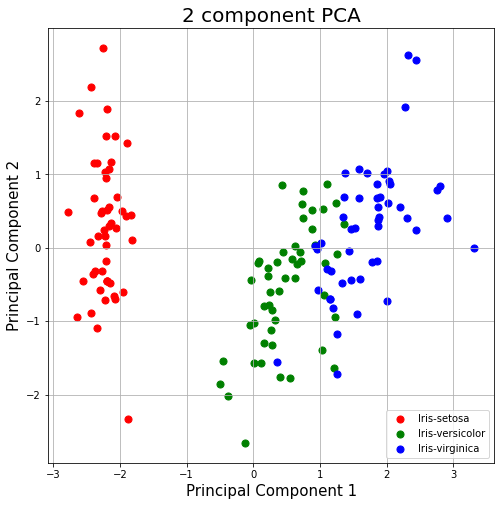

In [63]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df['target'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

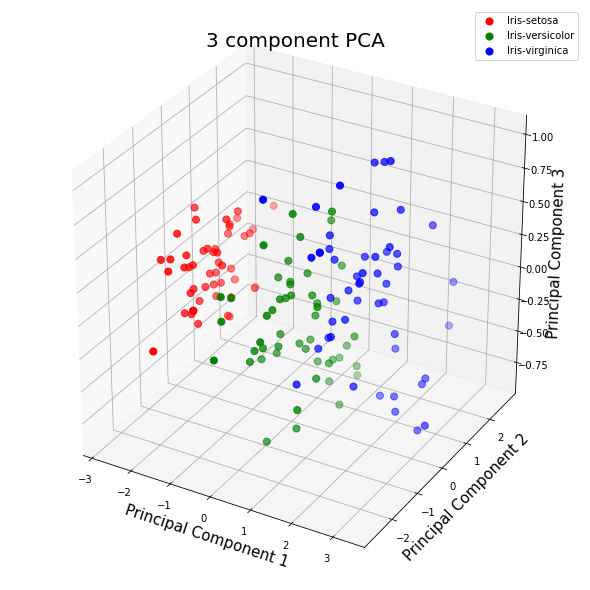

In [67]:

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
from mpl_toolkits.mplot3d import axes3d, Axes3D 
fig = plt.figure(figsize = (8,8))
ax = Axes3D(fig)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df['target'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , principalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()